<a href="https://colab.research.google.com/github/DaveStutler/G9/blob/Darian/TEAM_FRIENDSHIP_PARTICLES_WOOOOO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install uproot awkward
!pip install pandas


!pip install lumin uproot
!git clone https://github.com/SauceCat/PDPbox.git && cd PDPbox && pip install -e .

Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 5, in <module>
    from pip._internal.cli.main import main
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/main.py", line 10, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/autocompletion.py", line 10, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/main_parser.py", line 9, in <module>
    from pip._internal.build_env import get_runnable_pip
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/build_env.py", line 19, in <module>
    from pip._internal.cli.spinners import open_spinner
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/spinners.py", line 9, in <module>
    from pip._internal.utils.logging import get_indentation
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/util

#Installs

## Imports

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from scipy import sparse
from scipy.sparse import csr_matrix
#import uproot
# ^ we only need uproot if we are running the code from the very beginning
import pandas as pd
import numpy
import matplotlib.pyplot as plt

## Data Exploration

#All plots from linear

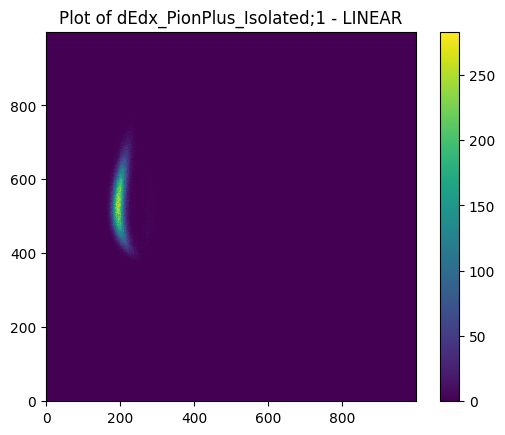

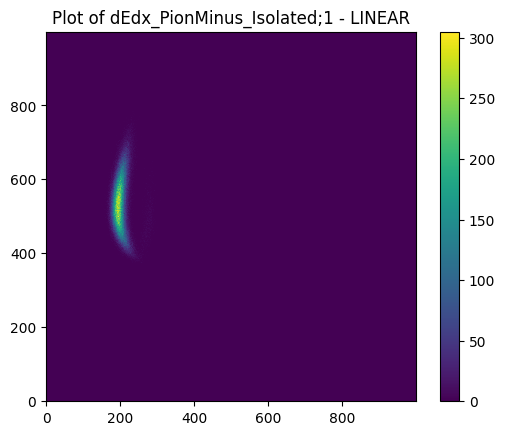

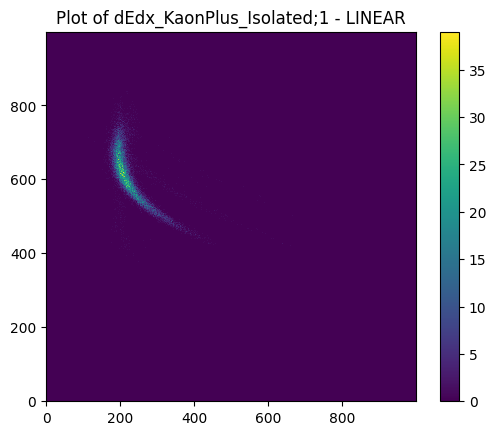

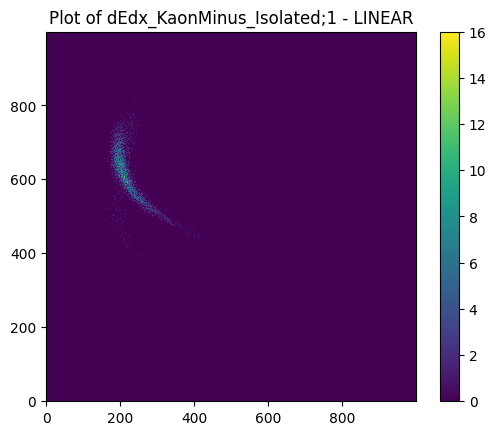

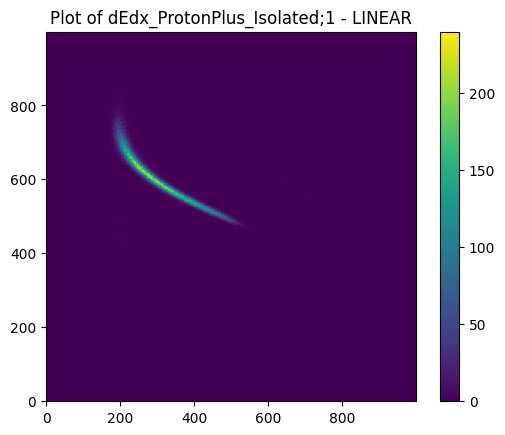

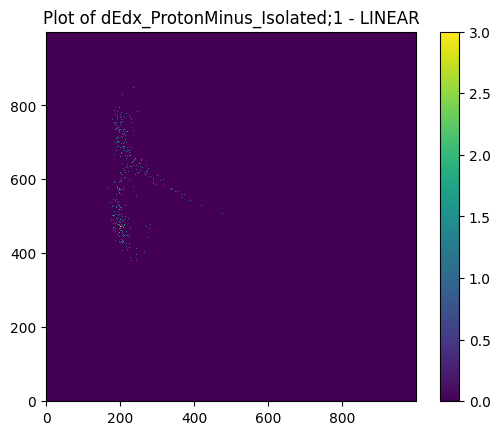

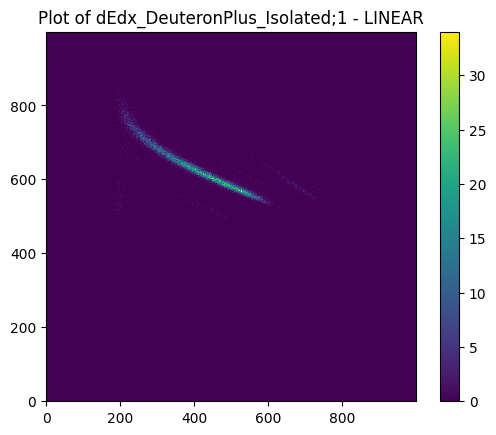

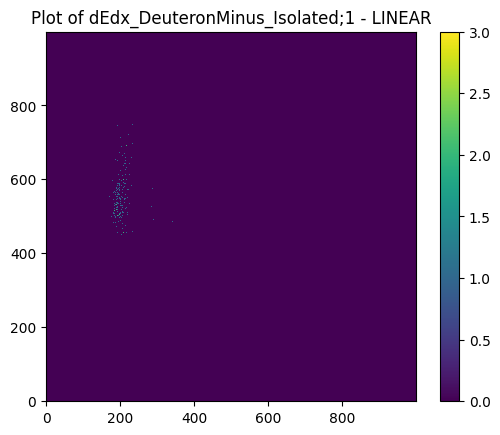

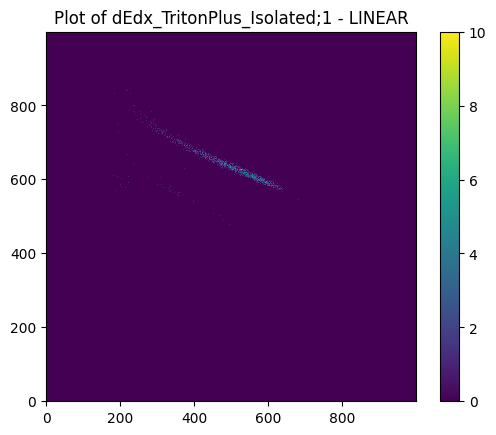

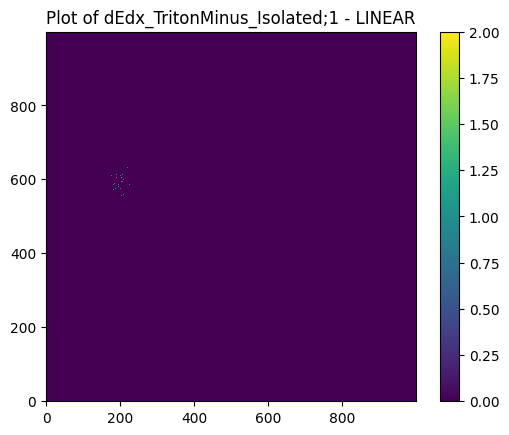

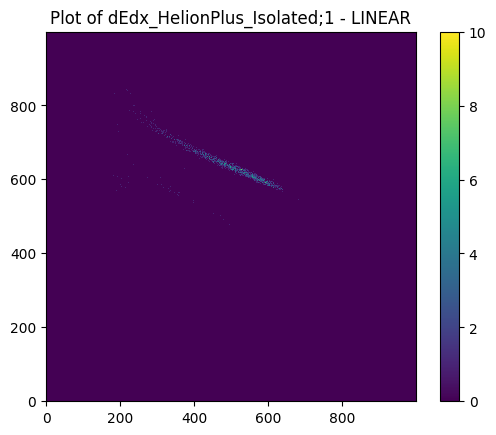

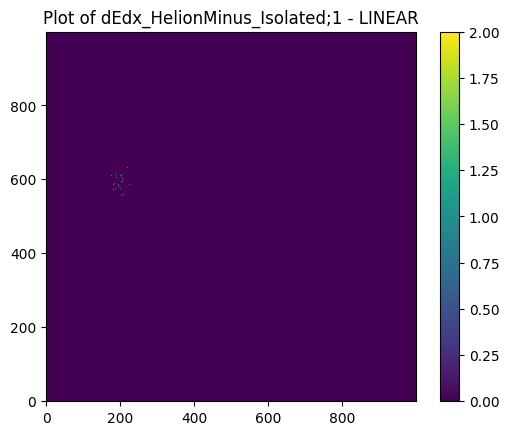

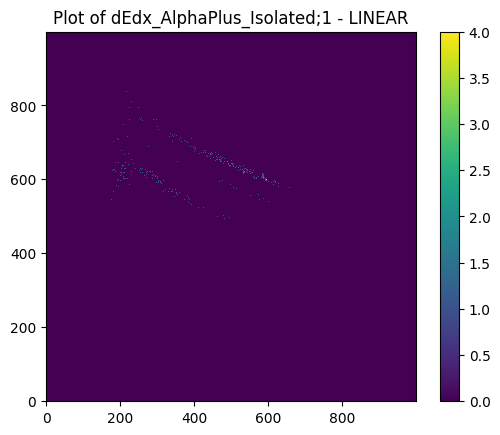

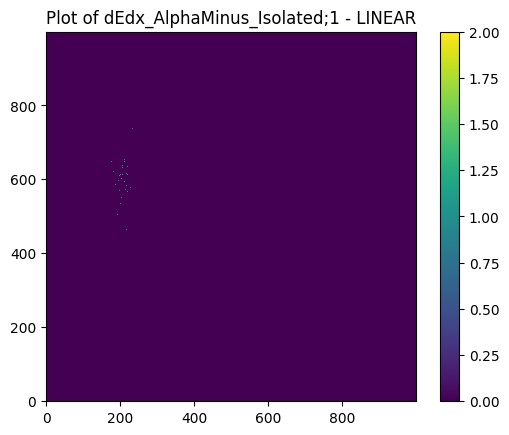

In [ ]:

root_file = uproot.open("/content/Output_File_2023_02_15.root")
tree_names = ['dEdx_PionPlus_Isolated;1', 'dEdx_PionMinus_Isolated;1', 'dEdx_KaonPlus_Isolated;1',
'dEdx_KaonMinus_Isolated;1',
'dEdx_ProtonPlus_Isolated;1',
'dEdx_ProtonMinus_Isolated;1',
'dEdx_DeuteronPlus_Isolated;1',
'dEdx_DeuteronMinus_Isolated;1',
'dEdx_TritonPlus_Isolated;1',
'dEdx_TritonMinus_Isolated;1',
'dEdx_HelionPlus_Isolated;1',
'dEdx_HelionMinus_Isolated;1',
'dEdx_AlphaPlus_Isolated;1',
'dEdx_AlphaMinus_Isolated;1']


mydict = {}


for tree_name in tree_names:
    mydict[tree_name] = [root_file[tree_name].values()]
    plt.imshow(mydict[tree_name][0], cmap='viridis', interpolation='nearest')
    plt.colorbar()
    plt.title(f"Plot of {tree_name} - LINEAR")
    plt.gca().invert_yaxis()
    plt.show()
linear_df = pd.DataFrame(mydict)
# one hot encoding
linear_df['linear'] = 1
linear_df['circular'] = 0

#All plots from circular data

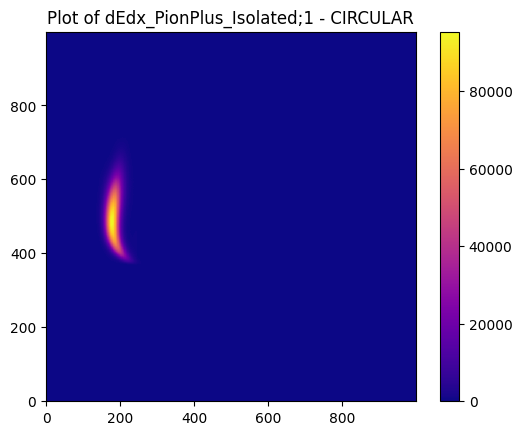

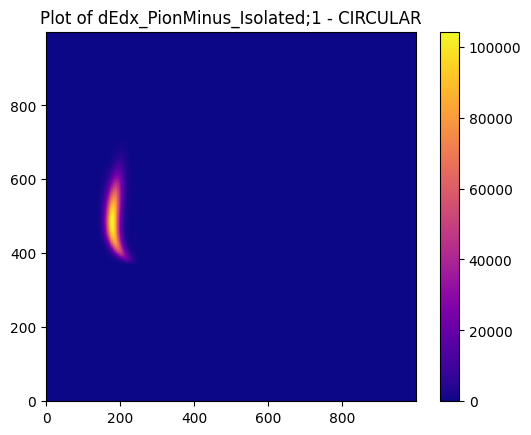

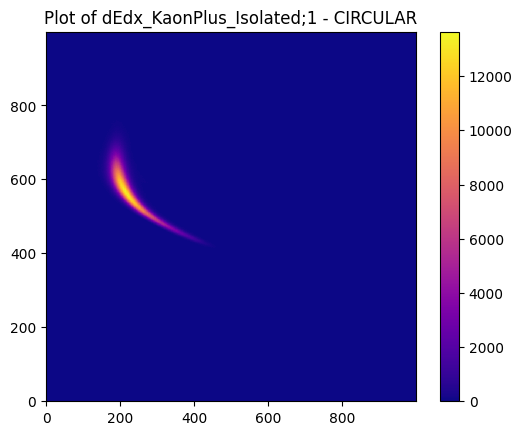

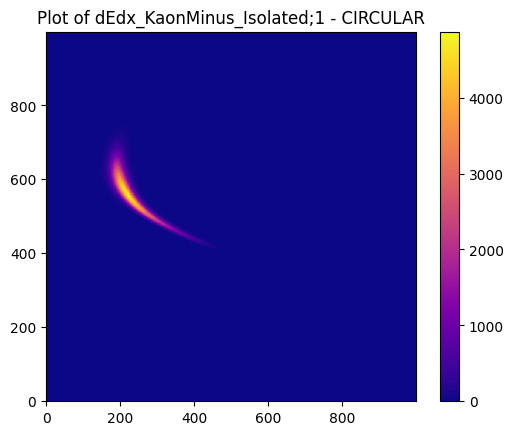

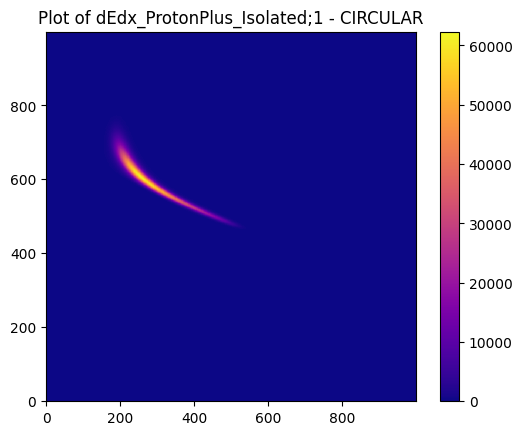

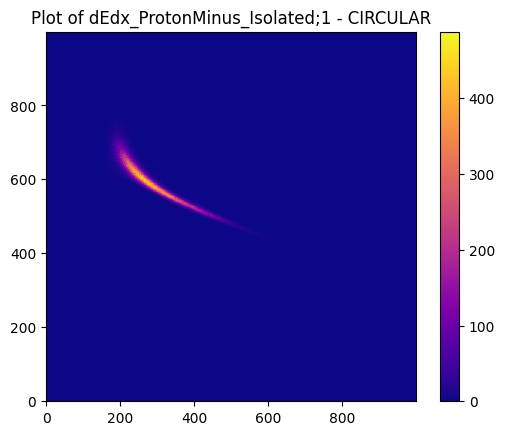

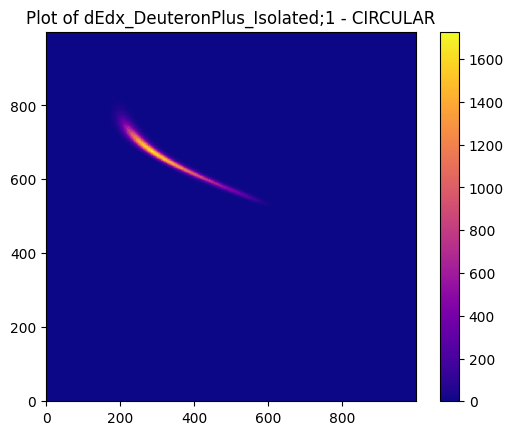

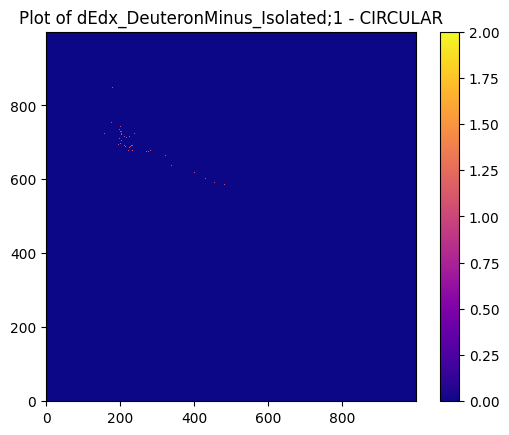

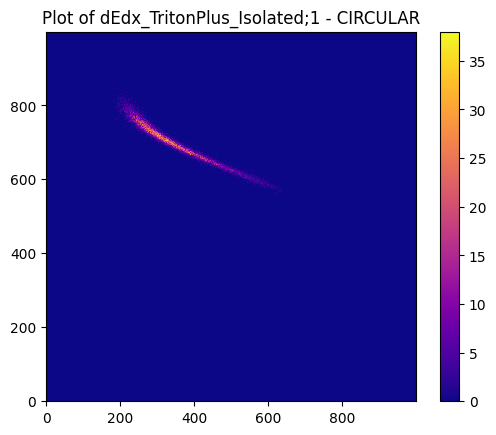

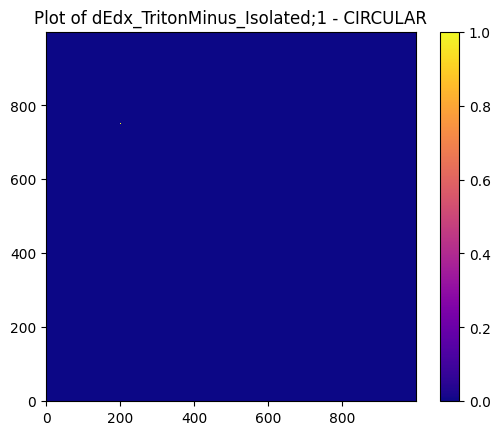

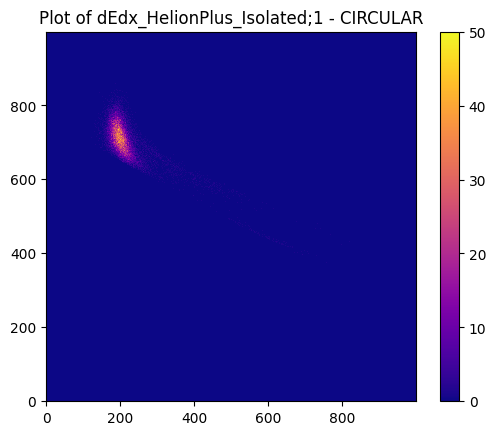

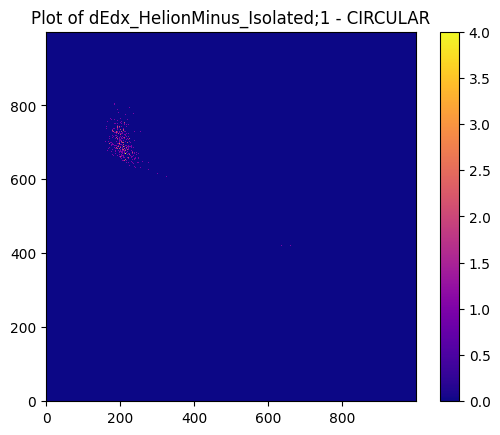

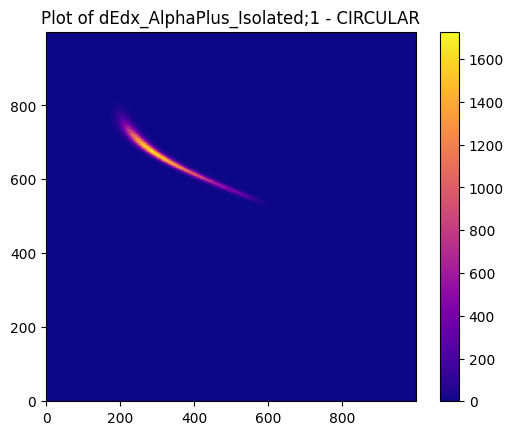

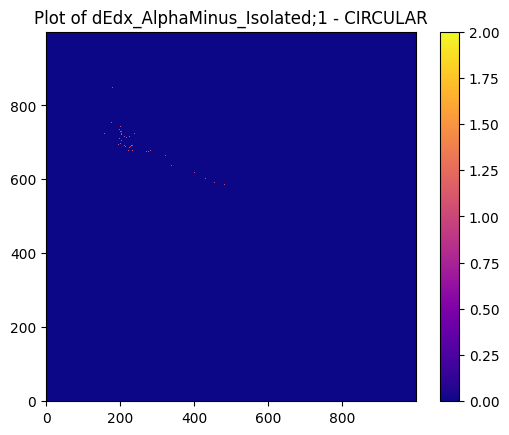

In [ ]:
import uproot
import pandas as pd
import numpy
import matplotlib.pyplot as plt

root_file = uproot.open("/content/yieldHistos_7p7GeV_Pion_2022_08_31 (1).root")



tree_names = ['dEdx_PionPlus_Isolated;1', 'dEdx_PionMinus_Isolated;1', 'dEdx_KaonPlus_Isolated;1',
'dEdx_KaonMinus_Isolated;1',
'dEdx_ProtonPlus_Isolated;1',
'dEdx_ProtonMinus_Isolated;1',
'dEdx_DeuteronPlus_Isolated;1',
'dEdx_DeuteronMinus_Isolated;1',
'dEdx_TritonPlus_Isolated;1',
'dEdx_TritonMinus_Isolated;1',
'dEdx_HelionPlus_Isolated;1',
'dEdx_HelionMinus_Isolated;1',
'dEdx_AlphaPlus_Isolated;1',
'dEdx_AlphaMinus_Isolated;1']


mydict = {}



for tree_name in tree_names:
    mydict[tree_name] = [root_file[tree_name].values()]
    plt.imshow(mydict[tree_name][0], cmap='plasma', interpolation='nearest')
    plt.colorbar()
    plt.title(f"Plot of {tree_name} - CIRCULAR")
    plt.gca().invert_yaxis()
    plt.show()
circular_df = pd.DataFrame(mydict)

# one hot encoding
circular_df['linear'] = 0
circular_df['circular'] = 1



In [ ]:
#testing to make sure plt.gca().invert_yaxis() wont mess up the data:
plt.subplot(1, 2, 1)
x = np.array([2, 3, 4])
y = x * 2 + 5
plt.plot(x, y)
plt.grid(True)

plt.subplot(1, 2, 2)
x = np.array([2, 3, 4])
y = x * 2 + 5
plt.plot(x, y)
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

# ok awesome looks good!

In [ ]:
combined_df = pd.concat([linear_df, circular_df], ignore_index=True)

combined_df


,dEdx_PionPlus_Isolated;1,dEdx_PionMinus_Isolated;1,dEdx_KaonPlus_Isolated;1,dEdx_KaonMinus_Isolated;1,dEdx_ProtonPlus_Isolated;1,dEdx_ProtonMinus_Isolated;1,dEdx_DeuteronPlus_Isolated;1,dEdx_DeuteronMinus_Isolated;1,dEdx_TritonPlus_Isolated;1,dEdx_TritonMinus_Isolated;1,dEdx_HelionPlus_Isolated;1,dEdx_HelionMinus_Isolated;1,dEdx_AlphaPlus_Isolated;1,dEdx_AlphaMinus_Isolated;1,linear,circular
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1,0
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0,1


In [ ]:
#GOAL = create a dataframe with 'position' (row), 'stopping power' (column), and then all the different features as seperate columns
#NOTE: you will be very confused if you dont understand this crucial obstacle that most of the code is combatting:
     #  most of the data is zeros, BUT THE NON ZERO ELEMENTS OCCUR IN DIFFERENT SPACES FOR ALL FEATURES
     #  thus if we selected only the non zero elements, we would not be able to conviently
     #match our elements based on row and column values in our dataframe, and thus our dataframe would not be helpful
     #  Thus we must find a range of data such that its likely that at least one feature will have a value at any point in this range
     # and then we will clean up our selection later


master = pd.DataFrame()
from scipy.sparse import find
# Heres the docs on how this function works:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.find.html


def local_min_max_finder(df, feature):
  #this function will find the minimum and maximum coordinate values of each matrix.
  # we are doing this so that all data points can be alligned with the minimum number of 0s
  # these local min and max values will be used to find the global min and max coordinates across all matrices so we know
  #the range of data that we need to include

  matrix0 = df[feature][0]
  #df[feature][0] will be the linear matrix for that feature

  matrix1 = df[feature][1]
  #df[feature][1] will be the circular matrix for that feature

  rows0, cols0, values0 = find(matrix0)
  # will find non zero values just so we can see the range of column and row indices

  rows0 = rows0.tolist()
  cols0 = cols0.tolist()


  rows1, cols1, values1 = find(matrix1)
  rows1 = rows1.tolist()
  cols1 = cols1.tolist()


  rows = rows0+rows1
  cols = cols0+cols1

  #will retrun the minimum row and maximum  row value where data is present
  #and minimum and maximum column value where data is present.
  #Note, these will likely not match up. For example, maybe the first row value occurs at (6,999) and the first column value
  #occurs at (9999, 2). Then we would output min row = 6 and min col 2 even if there is no data here.
  #we sacrific potentially having extra zeros in exchange for getting all the data and ensuring the data lines up

  return(min(rows), max(rows), min(cols), max(cols))

def global_min_max_finder(df):

  #uses local_min_max_finder to find the min and max row and column values for the whole dataset
  #why this is important:
  #.  allows us to delete a large amount of 0 space
  #.  ALLOWS ALL ROWS IN THE DATAFRAME

  minrows = []
  maxrows = []
  mincols = []
  maxcols = []
  for name in tree_names:
    a, b, c, d = local_min_max_finder(df, name)
    minrows.append(a)
    maxrows.append(b)
    mincols.append(c)
    maxcols.append(d)
  globalminrow = min(minrows)
  globalmaxrow = max(maxrows)
  globalmincol = min(mincols)
  globalmaxcol = max(maxcols)
  #returns the lowest and highest row and column values across all feature matrices

  return(globalminrow, globalmaxrow, globalmincol, globalmaxcol)



def value_getter(df, feature):
    # Uses the global max and min values to iterate through the inserted matrix and
    #find all the values in that range, include the ones where it is 0, because there could be data
    # here in another matrix so we must include it or else the dataframes will be of different sizes and we wont be able to merge
    minrow, maxrow, mincol, maxcol = global_min_max_finder(df)
    local = pd.DataFrame()
    #creates df

    matrix0 = df[feature][0]
    #will be linear matrix of feature

    matrix1 = df[feature][1]
    #will be circular matrix of feature

    values0 = []
    rows0 = []
    columns0 = []
    #these are for linbear too ^

    values1 = []
    rows1 = []
    columns1 = []
    #and these are for circular ^


    for row in range(minrow-1,maxrow+1):
      for column in range(mincol-1,maxcol+1):
        values0.append(matrix0[row, column])
        rows0.append(row)
        columns0.append(column)

        values1.append(matrix1[row, column])
        rows1.append(row)
        columns1.append(column)
        #getting a list of rows columns and the values at their intersections

    linear = ([1] * len(rows0)) + ([0]*len(rows1))
    circular = ([0] * len(rows0)) + ([1]*len(rows1))
    #so we can keep track of linear vs circular entries. Note: linear will be on top of list and circlar on bottom

    local['position'] = rows0 + rows1
    local['stopping power'] = columns0 + columns1
    local[feature] = values0 + values1
    local['linear'] = linear
    local['circular'] = circular
    #creates dataframe with all the linear values on top followed by ones on bottom

    return(local)
#print(value_getter(combined_df, tree_names[0]))
#print(value_getter(linear_df, tree_names[0]))

def recursive_merger(names, df, prev):
  #recursively calls the dataframe generator and merges dataframes together 2 at a time, connecting them by their
  #'position' (rows), 'stopping power' (columns), 'linear', and 'circular'values
  if len(names) == 0:

    return(prev)

  elif prev is None:
    prev = value_getter(df, names[0])

    return recursive_merger(names[1:], df, prev)
  else:
    current = value_getter(df, names[0])
    prev = pd.merge(current, prev, on=['position', 'stopping power', 'linear', 'circular'], how='inner')
    return recursive_merger(names[1:], df, prev)

master = recursive_merger(tree_names, combined_df, None)
print(type(master))
rows_to_drop = []
for index, row in master.iterrows():
    for column in tree_names:
        if all(row[column] == 0 for column in tree_names):
          rows_to_drop.append(index)
# this code sorts through the resulkting df to see if there are any banal rows where all features are 0 and deletes them.
# this baby takes awhile to run. For me about ~11. But we only need to run it once since we can save it as a csv


master.drop(rows_to_drop, inplace=True)
print(master)


<class 'pandas.core.frame.DataFrame'>
        position  stopping power  dEdx_AlphaMinus_Isolated;1  linear  \
4474         367             267                           0       1   
6137         369             234                           0       1   
6161         369             258                           0       1   
6171         369             268                           0       1   
6176         369             273                           0       1   
...          ...             ...                         ...     ...   
930395       898             172                           0       0   
931246       899             175                           0       0   
933794       902             179                           0       0   
938880       908             177                           0       0   
950774       922             199                           1       0   

        circular  dEdx_AlphaPlus_Isolated;1  dEdx_HelionMinus_Isolated;1  \
4474           0     

In [141]:
#You do not need to run the code again cause I made a csv file

masterr = '/content/HolyGrail.csv'

master = pd.read_csv(masterr)

master.head()

,position,stopping power,dEdx_AlphaMinus_Isolated;1,linear,circular,dEdx_AlphaPlus_Isolated;1,dEdx_HelionMinus_Isolated;1,dEdx_HelionPlus_Isolated;1,dEdx_TritonMinus_Isolated;1,dEdx_TritonPlus_Isolated;1,dEdx_DeuteronMinus_Isolated;1,dEdx_DeuteronPlus_Isolated;1,dEdx_ProtonMinus_Isolated;1,dEdx_ProtonPlus_Isolated;1,dEdx_KaonMinus_Isolated;1,dEdx_KaonPlus_Isolated;1,dEdx_PionMinus_Isolated;1,dEdx_PionPlus_Isolated;1
0,367,267,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,369,234,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,369,258,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,369,268,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,369,273,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [142]:
# reformating the csv file so that the columns are in the right order

ordered = list(master.columns[:3]) + list(master.columns[5:]) + list([master.columns[3]]) + list([master.columns[4]])
holygrail = master[ordered]
print(holygrail.head())
#!!!! NOTE: do NOT run the above line of code more than once in one session. Or else the ordering for master will be messed up again

   position  stopping power  dEdx_AlphaMinus_Isolated;1  \
0       367             267                           0   
1       369             234                           0   
2       369             258                           0   
3       369             268                           0   
4       369             273                           0   

   dEdx_AlphaPlus_Isolated;1  dEdx_HelionMinus_Isolated;1  \
0                          0                            0   
1                          0                            0   
2                          0                            0   
3                          0                            0   
4                          0                            0   

   dEdx_HelionPlus_Isolated;1  dEdx_TritonMinus_Isolated;1  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0 

In [143]:
# incase we want to run the code only from the csv file, we will need these again
tree_names = ['dEdx_PionPlus_Isolated;1', 'dEdx_PionMinus_Isolated;1', 'dEdx_KaonPlus_Isolated;1',
'dEdx_KaonMinus_Isolated;1',
'dEdx_ProtonPlus_Isolated;1',
'dEdx_ProtonMinus_Isolated;1',
'dEdx_DeuteronPlus_Isolated;1',
'dEdx_DeuteronMinus_Isolated;1',
'dEdx_TritonPlus_Isolated;1',
'dEdx_TritonMinus_Isolated;1',
'dEdx_HelionPlus_Isolated;1',
'dEdx_HelionMinus_Isolated;1',
'dEdx_AlphaPlus_Isolated;1',
'dEdx_AlphaMinus_Isolated;1']

In [144]:
#NOTE: this code normalizes linear and circular elements seperately. See discord https://discord.com/channels/1139651953937358888/1139651954675568709/1146933407704690814
# for explaination
target_columns = ['linear', 'circular']
other_columns = holygrail.columns[:-2]
train, test = train_test_split(holygrail, test_size=0.2, random_state=41, shuffle=True)



# NOTE to run the kfolds validation, you need to have the data in the code chunk above

In [145]:



# to normalize the train and test sets seprately to avoid data leakage
# We need to include both the X and the y values when we normalize to ensure we are normalizing seprately based
# on the different collider shapes in order to account for a difference in the sample size for each
# we will detele the labels from X train and test as soon as we normalize

import random

threshold = .02 #To get rid of noise in the data. we might change this later we have time for anomily detection



def normalizer(df):
  #print(df.columns)
  linear_rows = df[df['linear'] == 1].copy()
  circle_rows = df[df['circular'] == 1].copy()

  for column in df.columns:
      if column in ['linear', 'circular']:
        continue
      else:
        column_datal = linear_rows[column]
        maximl = column_datal.max()
        miniml = column_datal.min()
        linear_rows.loc[:, column] = np.where(
            (column_datal - miniml) / (maximl - miniml) > threshold,
            (column_datal - miniml) / (maximl - miniml),
            0)

        column_datac = circle_rows[column]
        maximc = column_datac.max()
        minimc = column_datac.min()
        circle_rows.loc[:, column] = np.where(
            (column_datac - minimc) / (maximc - minimc) > threshold,
            (column_datac - minimc) / (maximc - minimc),
            0)
        #mix all the linear and circular rows together so that the data is more randomized
  mixed_rows = pd.concat([linear_rows, circle_rows], ignore_index=True)
  mixed_rows = mixed_rows.sample(frac=1, random_state=42).reset_index(drop=True)

    # Clean up all-zero rows
  rows_to_drop = []
  for index, row in mixed_rows.iterrows():
      for column in tree_names:
          if all(row[column] == 0 for column in tree_names):
              rows_to_drop.append(index)

  mixed_rows.drop(rows_to_drop, inplace=True)
  return mixed_rows


norm_train = normalizer(train)
norm_test = normalizer(test)




<ipython-input-145-a4466cdccc5d>:32: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  circle_rows.loc[:, column] = np.where(
<ipython-input-145-a4466cdccc5d>:24: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  linear_rows.loc[:, column] = np.where(
<ipython-input-145-a4466cdccc5d>:32: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newv

In [8]:
y_train = norm_train[['linear', 'circular']]
X_train = norm_train.drop(['linear', 'circular'], axis=1)


y_test = norm_test[['linear', 'circular']]
X_test = norm_test.drop(['linear', 'circular'], axis=1)

In [77]:
X_train.to_csv('X_train.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

# NOTE: START HERE! WE ALREADY GENERATED THE CSV, SO THE CODE BEFORE THIS POINT (which generates the csv) IS NOT NEEDED

In [56]:
# START HERE

X_train = pd.read_csv('/content/X_train.csv')
X_test = pd.read_csv('/content/X_test.csv')
y_train = pd.read_csv('/content/y_train.csv')
y_test = pd.read_csv('/content/y_test.csv')

# DNN Binary Classification: Linear vs. Circular Collisions



In [148]:
# installations and imports

!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.model_selection import KFold
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier #getting weird error
from tensorflow.keras import optimizers
from sklearn.model_selection import cross_val_score, cross_validate


## p-Value Analysis

In [49]:
# to see how big the difference is between circular and linear:
import scipy.stats as stats

def tstat_finder(df):

  linear_rows = df[df['linear'] == 1].copy()
  circle_rows = df[df['circular'] == 1].copy()


#t_tests

  for column in linear_rows:
    if column in ['linear', 'circular']:
          continue

    tstat, p_val = stats.ttest_ind(linear_rows[column], circle_rows[column])
    print('FEATURE:',  column, "\n PVAL", p_val, "\n")
print('TRAIN VALUES\n~~~~~~~~~~~~~\n\n')
tstat_finder(norm_train)
print('\n\nTEST VALUES\n~~~~~~~~~~~~~\n\n')
tstat_finder(norm_test)

# we are getting p values very close to 0. This means there is a very significant difference between circular and linear colliders.
# I am checking the p values to see if the high accuracy scores in the models make sense
# based on the fact that we have a lot of data and there is a very distinct difference between the classes and there was no data leakage,
# we can conclude that the models are really predicting the data well

TRAIN VALUES
~~~~~~~~~~~~~


FEATURE: position 
 PVAL 3.955838360040343e-15 

FEATURE: stopping power 
 PVAL 0.0 

FEATURE: dEdx_AlphaMinus_Isolated;1 
 PVAL 0.45895422976464684 

FEATURE: dEdx_AlphaPlus_Isolated;1 
 PVAL 0.0 

FEATURE: dEdx_HelionMinus_Isolated;1 
 PVAL 2.801919524195176e-190 

FEATURE: dEdx_HelionPlus_Isolated;1 
 PVAL 0.0 

FEATURE: dEdx_TritonMinus_Isolated;1 
 PVAL 3.644763925872197e-10 

FEATURE: dEdx_TritonPlus_Isolated;1 
 PVAL 0.0 

FEATURE: dEdx_DeuteronMinus_Isolated;1 
 PVAL 2.011108068390051e-65 

FEATURE: dEdx_DeuteronPlus_Isolated;1 
 PVAL 0.01847293348522015 

FEATURE: dEdx_ProtonMinus_Isolated;1 
 PVAL 0.0 

FEATURE: dEdx_ProtonPlus_Isolated;1 
 PVAL 2.5835334882287187e-46 

FEATURE: dEdx_KaonMinus_Isolated;1 
 PVAL 9.03875400075841e-201 

FEATURE: dEdx_KaonPlus_Isolated;1 
 PVAL 1.958305926643501e-43 

FEATURE: dEdx_PionMinus_Isolated;1 
 PVAL 0.0029406406081586103 

FEATURE: dEdx_PionPlus_Isolated;1 
 PVAL 3.6960714161491235e-07 



TEST VALUES
~~~~~

## Creating Model then Training and Testing

In [58]:
len(X_train.columns)

16

Epoch 1/5
3629/3629 [==============================] - 8s 2ms/step - loss: 0.2024 - accuracy: 0.9054
Epoch 2/5
3629/3629 [==============================] - 7s 2ms/step - loss: 0.0861 - accuracy: 0.9628
Epoch 3/5
3629/3629 [==============================] - 7s 2ms/step - loss: 0.0681 - accuracy: 0.9715
Epoch 4/5
3629/3629 [==============================] - 7s 2ms/step - loss: 0.0587 - accuracy: 0.9748
Epoch 5/5
886/886 [==============================] - 1s 1ms/step
MSE is: 0.08119936584788495 
Acuuracy is: 0.9099604687279401
              precision    recall  f1-score   support

      linear       0.84      0.99      0.91     12965
    circular       0.99      0.84      0.91     15367

    accuracy                           0.91     28332
   macro avg       0.92      0.92      0.91     28332
weighted avg       0.92      0.91      0.91     28332



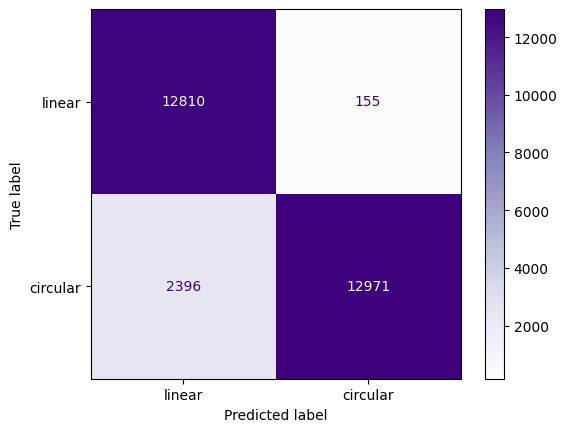

In [64]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
#print(holygrail.head())
target_columns = ['linear', 'circular']

classifier = Sequential()

classifier.add(Dense(units = len(X_train.columns), activation = 'ReLU', input_dim = len(other_columns)))

classifier.add(Dense(units = 12, activation = 'ReLU'))
classifier.add(Dense(units = 12, activation = 'ReLU'))
classifier.add(Dense(units = 12, activation = 'ReLU'))
classifier.add(Dense(units = 12, activation = 'ReLU'))
classifier.add(Dense(units = 2, activation = 'sigmoid'))


classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


history = classifier.fit(X_train, y_train, batch_size = 32, epochs = 5)

yhat_test = classifier.predict(X_test.astype(float))
yhat_test

yhat_binary = (yhat_test == yhat_test.max(axis=1, keepdims=True)).astype(int)

y_test_values = y_test.values

accuracy = accuracy_score(y_test, yhat_binary)

mse = mean_squared_error(y_test, yhat_test)

print("MSE is:", mse, '\nAcuuracy is:', accuracy)

print(classification_report(y_test_values.argmax(axis=1),yhat_binary.argmax(axis=1),target_names=target_columns,digits=2))

matrixim = confusion_matrix(y_test_values.argmax(axis=1), yhat_binary.argmax(axis=1))
mycmdisp = ConfusionMatrixDisplay(confusion_matrix=matrixim, display_labels=target_columns)
mycmdisp.plot(cmap=plt.cm.Purples, values_format='d')




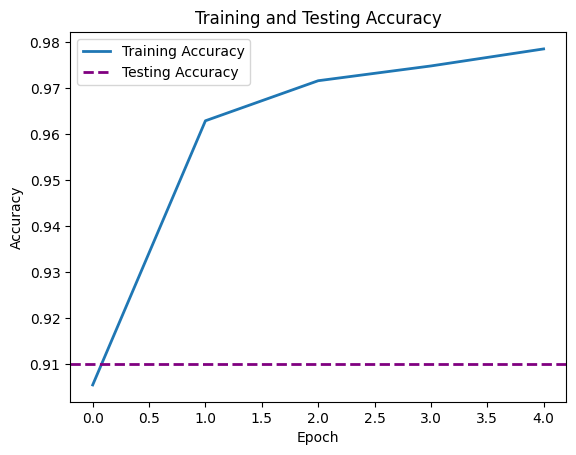

In [65]:
plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
plt.axhline(y=accuracy, label='Testing Accuracy', linestyle='--', color = 'purple', linewidth=2)
plt.title('Training and Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# this graph is our anwser to #4 on the assignment description. It shows our fitting graph showing how the training accuracy relates to testing accuracy.
# As you can see, out training accuracy is higher than the testing accuracy which may be due to the different in pvalues associated with the different features in the training and testing sets
# We determined that normalizing the training and testing sets seprately was nesecary in order to avoid dataleakage, but it did result in statistically significant differences in pvalues for certain features
# We determined that this was an acceptable tradeoff in order to have a model that better generalizes to real world data
# we feel 91 is still a very good accuracy level

## k-Fold Cross Validation

In [82]:
# To be used to create instances of a DNN Model with the following architecture.
def Create_DNN_Model():
  classifier = Sequential() # Initialising the DNN.

  classifier.add(Dense(units = len(other_columns), activation = 'ReLU', input_dim = len(other_columns))) # 1st hidden layer.
  classifier.add(Dense(units = 12, activation = 'ReLU'))                                                 # 2nd hidden layer.
  classifier.add(Dense(units = 12, activation = 'ReLU'))                                                 # 3rd hidden layer.
  classifier.add(Dense(units = 12, activation = 'ReLU'))                                                 # 4th hidden layer.
  classifier.add(Dense(units = 12, activation = 'ReLU'))                                                 # 5th hidden layer.
  classifier.add(Dense(units = 2, activation = 'sigmoid'))                                               # Output layer.

  classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # Compiling DNN.

  return classifier

In [83]:

kfolds = KFold(n_splits=4, shuffle=True, random_state=20) # k-Fold cross-validation split.
# we will normalize seprately for validation and train.
# NOTE: in order to do this, you need to run a few code chunks before the downloading of the normalized train and test csvs

scores = []
for train_index, val_index in kfolds.split(train):
  train_fold, val_fold = train.iloc[train_index], train.iloc[val_index]
  train_fold = normalizer(train_fold)
  print('normalized successful for train')
  val_fold = normalizer(val_fold)
  print('normalized successful for val')
  y_train_fold = train_fold[['linear','circular']]
  X_train_fold = train_fold.drop(['linear','circular'], axis = 1)
  X_val_fold = val_fold.drop(['linear','circular'], axis = 1)
  y_val_fold = val_fold[['linear','circular']]
  model = Create_DNN_Model()
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  model.fit(X_train_fold, y_train_fold, epochs=5, batch_size=32, verbose=0)
  y_val_pred = model.predict(X_val_fold)
  accuracy = accuracy_score(y_val_fold, np.round(y_val_pred))
  scores.append(accuracy)







<ipython-input-81-a4466cdccc5d>:32: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  circle_rows.loc[:, column] = np.where(


normalized successful for train


<ipython-input-81-a4466cdccc5d>:24: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  linear_rows.loc[:, column] = np.where(
<ipython-input-81-a4466cdccc5d>:32: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  circle_rows.loc[:, column] = np.where(


normalized successful for val
911/911 [==============================] - 1s 1ms/step


<ipython-input-81-a4466cdccc5d>:32: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  circle_rows.loc[:, column] = np.where(


normalized successful for train


<ipython-input-81-a4466cdccc5d>:32: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  circle_rows.loc[:, column] = np.where(
<ipython-input-81-a4466cdccc5d>:24: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  linear_rows.loc[:, column] = np.where(


normalized successful for val
909/909 [==============================] - 1s 1ms/step


<ipython-input-81-a4466cdccc5d>:32: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  circle_rows.loc[:, column] = np.where(


normalized successful for train


<ipython-input-81-a4466cdccc5d>:24: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  linear_rows.loc[:, column] = np.where(
<ipython-input-81-a4466cdccc5d>:32: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  circle_rows.loc[:, column] = np.where(


normalized successful for val
908/908 [==============================] - 1s 1ms/step


<ipython-input-81-a4466cdccc5d>:24: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  linear_rows.loc[:, column] = np.where(
<ipython-input-81-a4466cdccc5d>:32: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  circle_rows.loc[:, column] = np.where(


normalized successful for train


<ipython-input-81-a4466cdccc5d>:32: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  circle_rows.loc[:, column] = np.where(


normalized successful for val
908/908 [==============================] - 1s 1ms/step


In [84]:
scores

[0.8900906468891636,
 0.9693143898998934,
 0.9019121447028424,
 0.8758694304799944]

In [90]:
# Report performance.
scores = np.array(scores)
print('\nOverall Average Accuracy: %.3f (sd = %.3f)\n' % (scores.mean(), scores.std()))

for idx, score in enumerate(scores):
    print("Fold {} Accuracy: {}".format(idx+1, str(round(score, 3))))

print('\n\nBEST FOLD = {}, ACCURACY OF BEST FOLD = {}'.format(np.argmax(scores) + 1, np.max(scores)))


Overall Average Accuracy: 0.909 (sd = 0.036)

Fold 1 Accuracy: 0.89
Fold 2 Accuracy: 0.969
Fold 3 Accuracy: 0.902
Fold 4 Accuracy: 0.876


BEST FOLD = 2, ACCURACY OF BEST FOLD = 0.9693143898998934


# DNN Linear Regression: Predicting the Stopping Power and Position based on the counts of the particles that were detected


<Axes: >

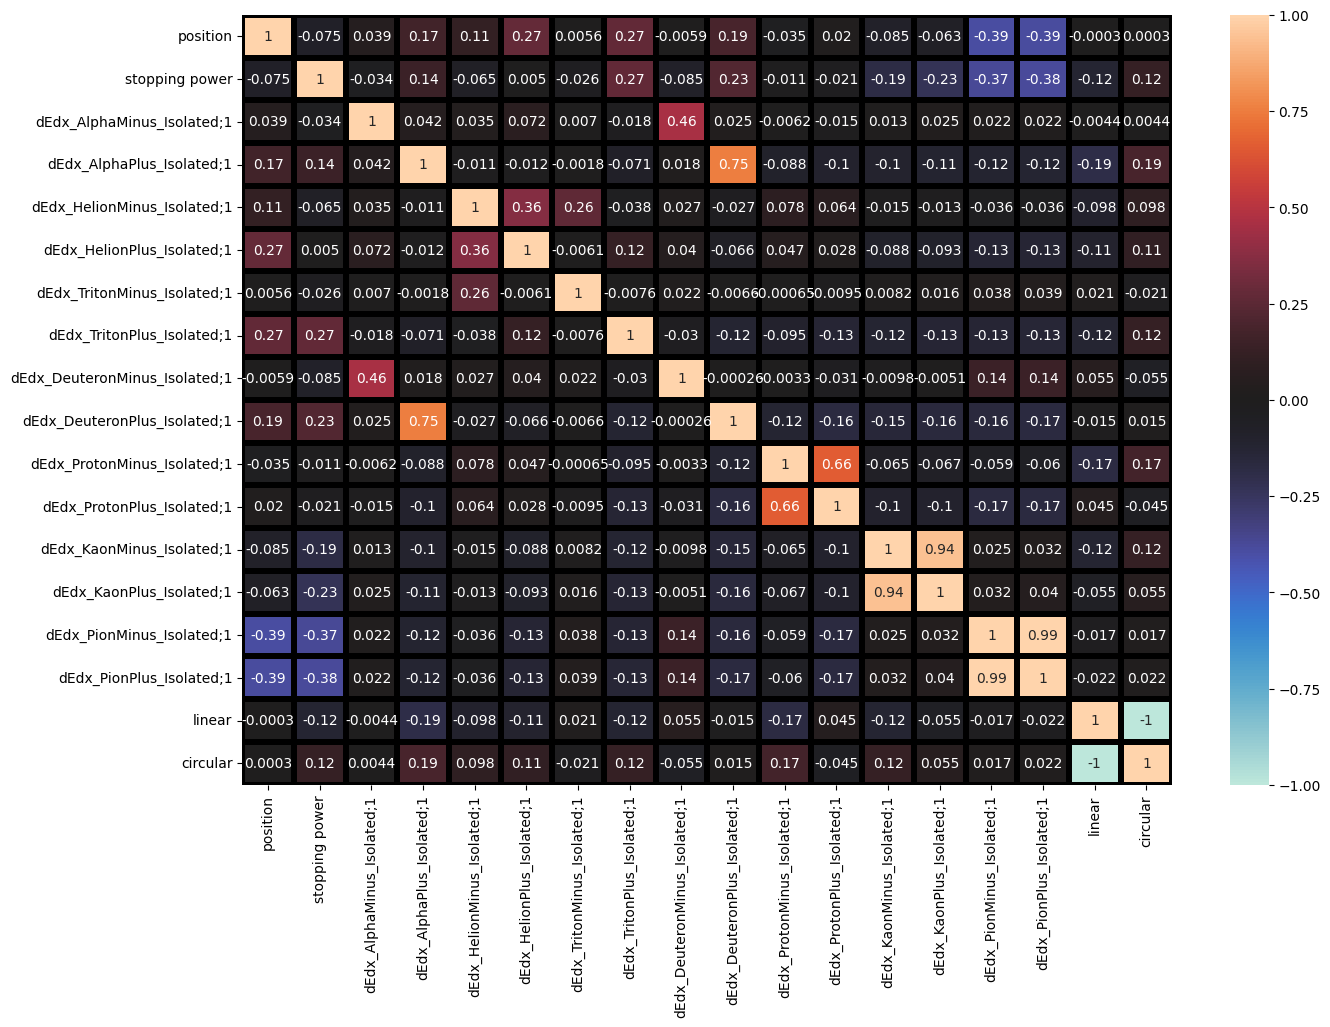

In [ ]:
# Just a heatmap for shits and giggles :P
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.heatmap(holygrail.corr(), annot = True, vmin = -1, vmax = 1, center = 0, linewidth= 3, linecolor = 'black', )

## Creating Model then Training and Testing

In [149]:
X_train = norm_train[['stopping power', 'position']]
y_train = norm_train.drop(['stopping power', 'position'], axis=1)


X_test = norm_test[['stopping power', 'position']]
y_test = norm_test.drop(['stopping power', 'position'], axis=1)

In [ ]:
# note, the way the dataframe is formatting is by saying the count of each particle that collided at that stopping power and position
# we want to use this to determine the likelihood that given a certain stopping power and position, a particule will collide there
from keras.metrics import RootMeanSquaredError
import tensorflow.keras.backend as K
from keras.utils import get_custom_objects
from keras.layers import LeakyReLU


def r2(test, pred):
    r2 = 1 - tf.reduce_sum(tf.square(test - pred)) / tf.reduce_sum(tf.square(test - tf.reduce_mean(test)))
    return r2
# tensor flow is self absorbed and only likes to it when you use its functions and no one elses

get_custom_objects().update({'R2': r2})
#professor said that r2 is a bad metric to use for this problem. But I'm leaving this function in to show that we coded the custom metric



classifier = Sequential()

classifier.add(Dense(units = len(X_train.columns), activation = 'linear', input_dim = len(X_train.columns)))

classifier.add(Dense(units=12, activation=LeakyReLU(alpha=0.01))) # to introduce non linearity
classifier.add(Dense(units=12, activation=LeakyReLU(alpha=0.01)))
classifier.add(Dense(units=12, activation=LeakyReLU(alpha=0.01)))
classifier.add(Dense(units = len(y_train.columns), activation = 'linear'))


classifier.compile(loss='MSE', optimizer='adam', metrics=['MSE'])


history = classifier.fit(X_train, y_train, batch_size = 32, epochs = 8, verbose = True)

yhat_test = classifier.predict(X_test.astype(float))




y_test_values = y_test.values



mse = mean_squared_error(y_test_values, yhat_test)
#r2_val = r2(y_test_values, yhat_test) #professor said that r2 is a bad metric to use for this problem
print("MSE is:", mse)




Epoch 1/8
3629/3629 [==============================] - 11s 3ms/step - loss: 0.0361 - MSE: 0.0361
Epoch 2/8
3629/3629 [==============================] - 7s 2ms/step - loss: 0.0324 - MSE: 0.0324
Epoch 3/8
3629/3629 [==============================] - 6s 2ms/step - loss: 0.0318 - MSE: 0.0318
Epoch 4/8
3629/3629 [==============================] - 7s 2ms/step - loss: 0.0314 - MSE: 0.0314
Epoch 5/8
2923/3629 [=======================>......] - ETA: 1s - loss: 0.0311 - MSE: 0.0311

## k-Fold Cross Validation (For Regression)
 NOTE: this has been commented out due to expensive GPU requirements. It is included as a demo for what we could achieve if we had access to a larger GPU


In [16]:
# To be used to create instances of a DNN Model with the following architecture.
def Create_Regression_Model():
  classifier = Sequential() # Initialising the DNN.

  classifier.add(Dense(units = len(X_train), activation = 'linear', input_dim = len(X_train))) # input layer.

  classifier.add(Dense(units=12, activation=LeakyReLU(alpha=0.01))) # to introduce non linearity
  classifier.add(Dense(units=12, activation=LeakyReLU(alpha=0.01)))
  classifier.add(Dense(units=12, activation=LeakyReLU(alpha=0.01)))
  classifier.add(Dense(units = 2, activation = 'linear'))                                                 # Output layer.

  classifier.compile(loss='MSE', optimizer='adam', metrics=['MSE']) # Compiling DNN.

  return classifier

In [ ]:
# Note: in theory this would work, but for now it requires too much GPU
# Also, we do not think it is nessecary since the mse we obtained from the original model was already low
# we still decided to include it as a comment though to include all group members code in the final submission and show that everyone contributed

'''kfolds = KFold(n_splits=5, shuffle=True, random_state=20) # k-Fold cross-validation split.

#r2_scores = [] #professor said that r2 is a bad metric to use for this problem
mse_scores = []

#I think this isnt working because X_train and y_train are df and not values. I was getting this error on hw2


for train_index, val_index in kfolds.split(train):
  train_fold, val_fold = train.iloc[train_index], train.iloc[val_index]
  train_fold = normalizer(train_fold)
  print('normalized successful for train')
  val_fold = normalizer(val_fold)
  print('normalized successful for val')
  y_train_fold = train_fold[['linear','circular']]
  X_train_fold = train_fold.drop(['linear','circular'], axis = 1)
  X_val_fold = val_fold.drop(['linear','circular'], axis = 1)
  y_val_fold = val_fold[['linear','circular']]
  model = Create_Regression_Model()
  model.fit(X_train_fold, y_train_fold, epochs=50, batch_size=32, verbose=0)
  yhat_test = model.predict(X_val_fold.astype(float))
  mse_val = mean_squared_error(y_val_fold, yhat_test)
  scores.append(accuracy)
  mse_scores.append(round(mse_val, 3))'''



In [ ]:
'''mse_scores'''

In [ ]:
'''mse_scores = numpy.array(mse_scores) # Converting to numpy arrays.



print('\nOverall Average MSE: %.3f (%.3f)' % (mse_scores.mean(), mse_scores.std()))


for idx, score in enumerate(mse_scores):
    print("Fold {} MSE: {}".format(idx+1, str(round(score, 3))))

print('BEST MSE FOLD = {}\n'.format(np.argmax(mse_scores) + 1))'''



# UNSUPERVIZED LEARNING

## Goals:
 - to detect outliers to help us clean up our data

## Changes we need to make to the data
 - We need to make seprate dataframes for each feature containing only the stopping speed, position, and count so that we can see where the outliers are


 ## Example of how the preprocessing will look:
Lets say we have a row that looks like this:



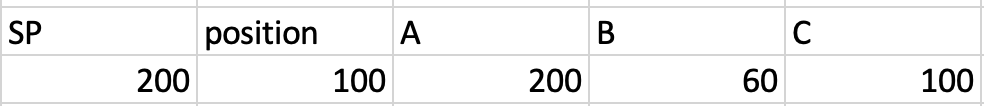

we want to change the formatting to make it look like this:

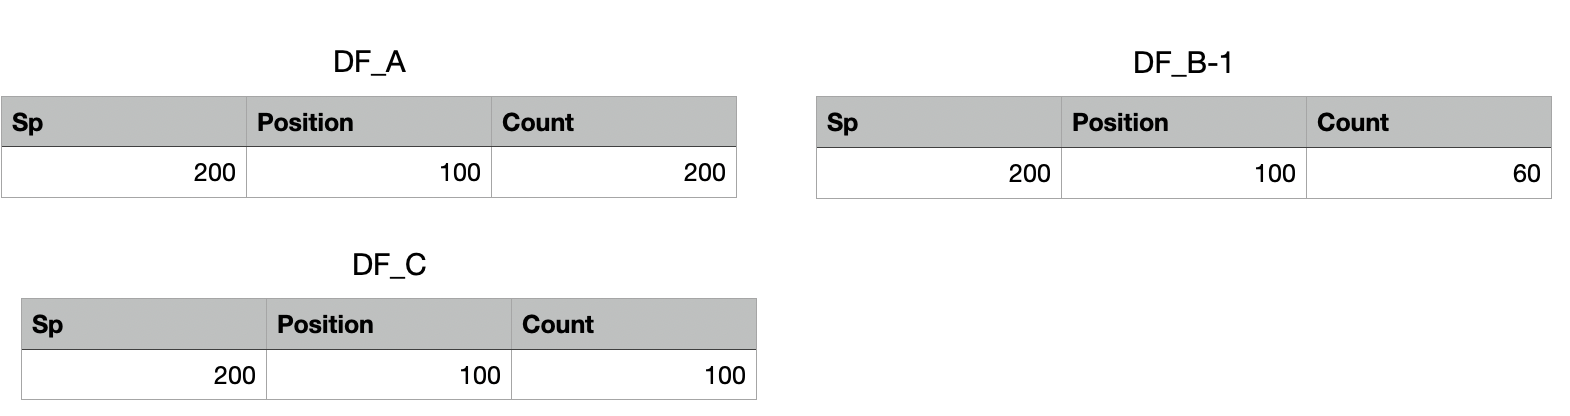

In [119]:
# we are going to modify our normalizer function to output the linear and circular rows without merging them:

import random

threshold = 0 #the cluasterer will help us determine noise, so we don't need a threshold

def normalizer(df):
  #print(df.columns)
  linear_rows = df[df['linear'] == 1].copy()
  circle_rows = df[df['circular'] == 1].copy()

  for column in df.columns:
      if column in ['linear', 'circular']:
        continue
      else:
        column_datal = linear_rows[column]
        maximl = column_datal.max()
        miniml = column_datal.min()
        linear_rows.loc[:, column] = np.where(
            (column_datal - miniml) / (maximl - miniml) > threshold,
            (column_datal - miniml) / (maximl - miniml),
            0)

        column_datac = circle_rows[column]
        maximc = column_datac.max()
        minimc = column_datac.min()
        circle_rows.loc[:, column] = np.where(
            (column_datac - minimc) / (maximc - minimc) > threshold,
            (column_datac - minimc) / (maximc - minimc),
            0)


  return circle_rows, linear_rows

In [121]:
features =  ['dEdx_PionPlus_Isolated;1', 'dEdx_PionMinus_Isolated;1', 'dEdx_KaonPlus_Isolated;1',
'dEdx_KaonMinus_Isolated;1',
'dEdx_ProtonPlus_Isolated;1',
'dEdx_ProtonMinus_Isolated;1',
'dEdx_DeuteronPlus_Isolated;1',
'dEdx_DeuteronMinus_Isolated;1',
'dEdx_TritonPlus_Isolated;1',
'dEdx_TritonMinus_Isolated;1',
'dEdx_HelionPlus_Isolated;1',
'dEdx_HelionMinus_Isolated;1',
'dEdx_AlphaPlus_Isolated;1',
'dEdx_AlphaMinus_Isolated;1'] #you have to go up quite a few code chunks to get these so I'm re including it


def dimensional_reducer(df):
  feature_dfs = []
  for col in features:
    temp_df = pd.DataFrame()
    positions = []
    sps = []
    counts = []
    for val_index in range(len(df[col].values)): # interating through so we can only include non-zero values
      if df[col].values[val_index] != 0:
        positions.append(df['position'].values[val_index])
        sps.append(df['stopping power'].values[val_index])
        counts.append(df[col].values[val_index])
    temp_df['position'] = positions
    temp_df['stopping power'] = sps
    temp_df['count'] = counts
    feature_dfs.append(temp_df)
  return feature_dfs

circle, linear = normalizer(holygrail)

circle_features = dimensional_reducer(circle)
linear_features = dimensional_reducer(linear)

#print(circle_features)

<ipython-input-119-4ef22f0c6c62>:27: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  circle_rows.loc[:, column] = np.where(


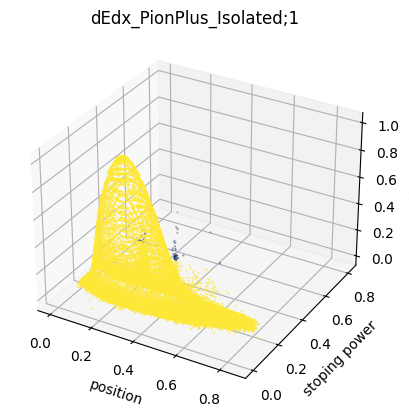

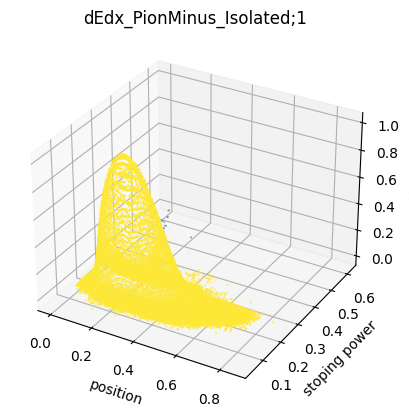

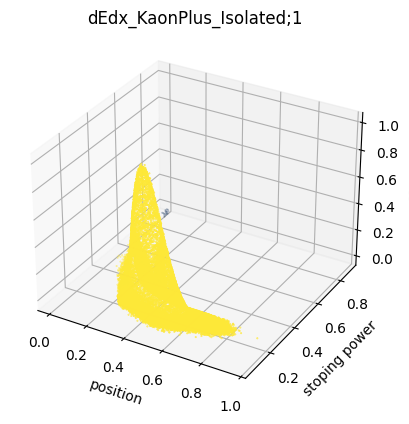

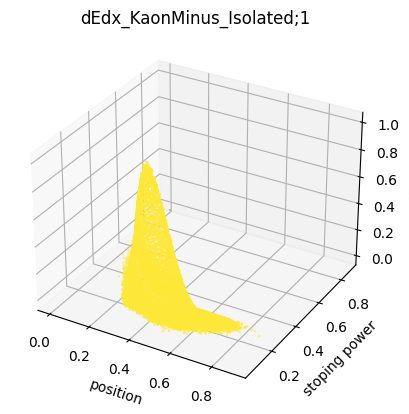

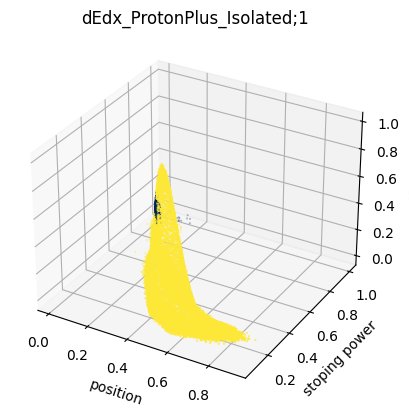

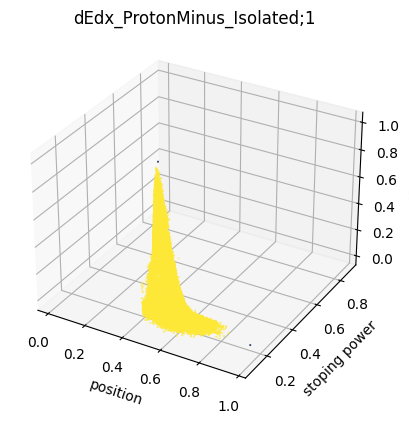

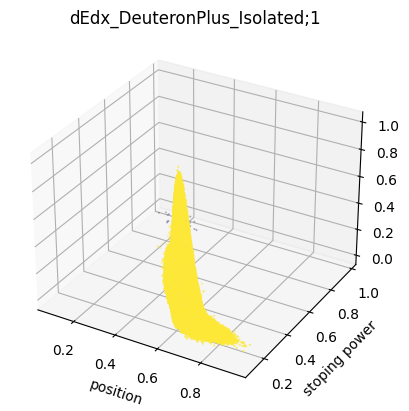

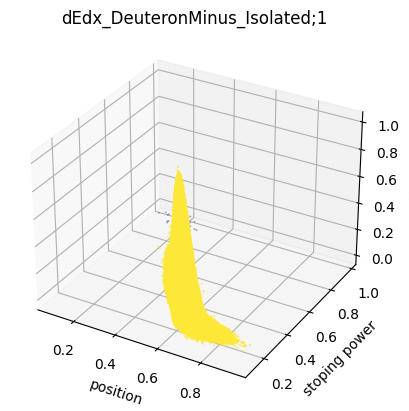

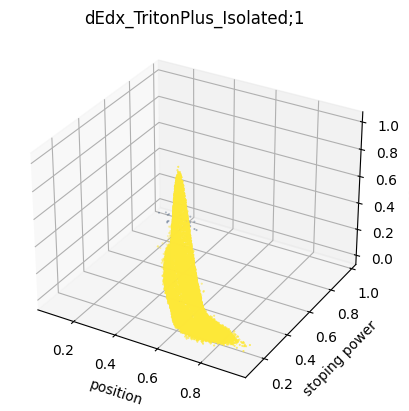

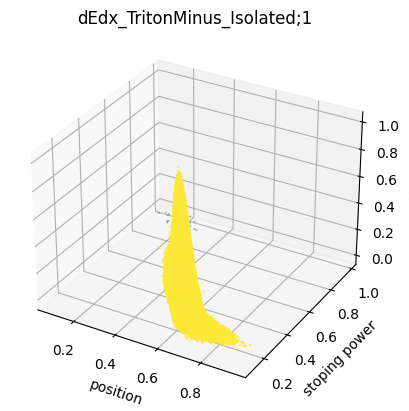

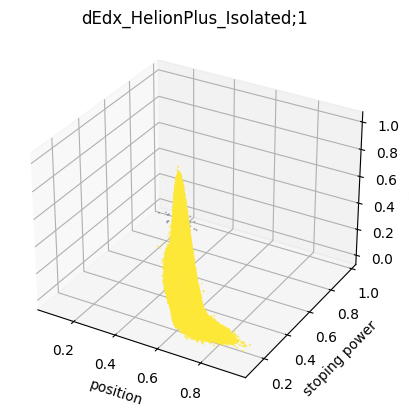

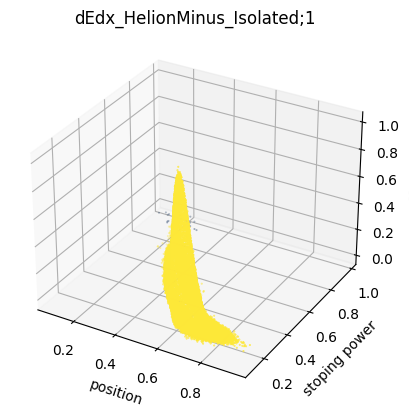

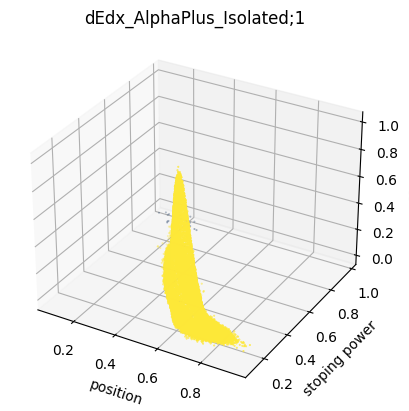

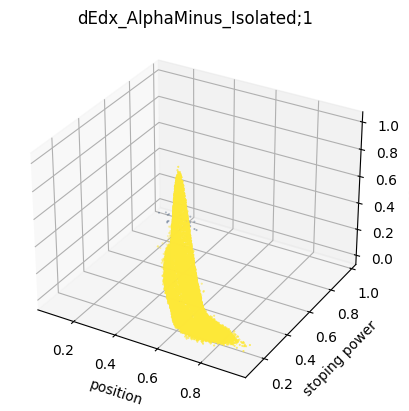

In [138]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

# for circular data
sample_size = 30000
counter = 0
graphs = []
my_labs = []
for feature in circle_features:
  if feature.shape[0] <= 30000:
    samp_circle = feature
  else:
    samp_circle = feature.sample(n=sample_size, random_state=42)
    feature_array = samp_circle.values

  dbscan = DBSCAN(eps=0.1, min_samples=400)
  dbscan.fit(feature_array)
  labels = dbscan.labels_

  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(feature_array[:, 0], feature_array[:, 1], feature_array[:, 2], c=labels, cmap='cividis', s=0.2)

  my_labs.append(labels)
  ax.set_xlabel("position")
  ax.set_ylabel("stoping power")
  ax.set_zlabel("count")
  ax.set_title(features[counter])
  counter += 1

  graphs.append(fig)
for graph in graphs:
  plt.show()

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


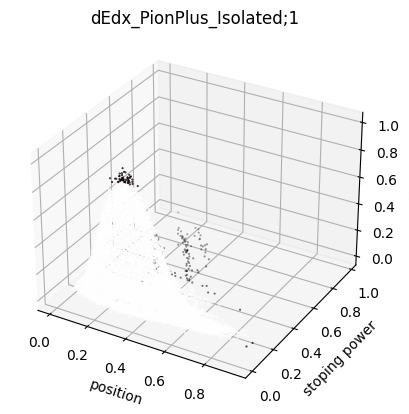

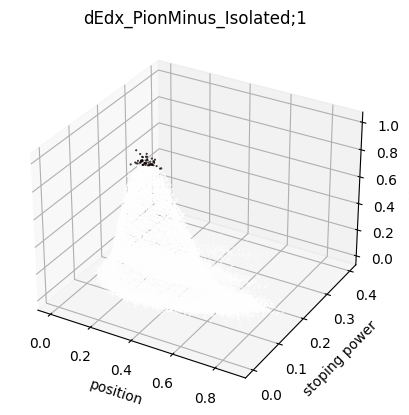

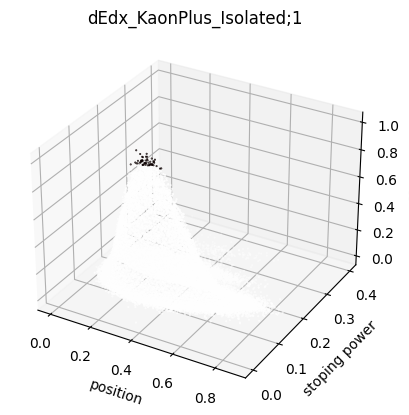

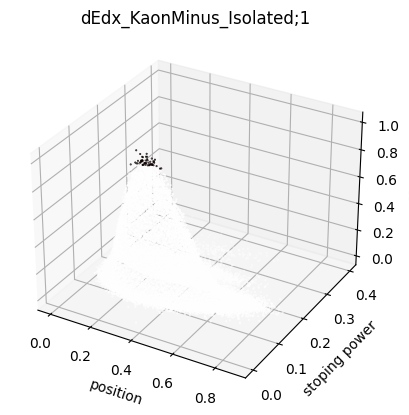

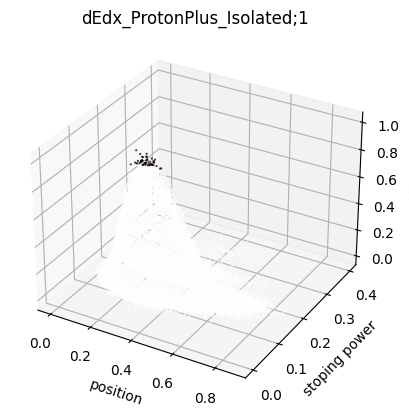

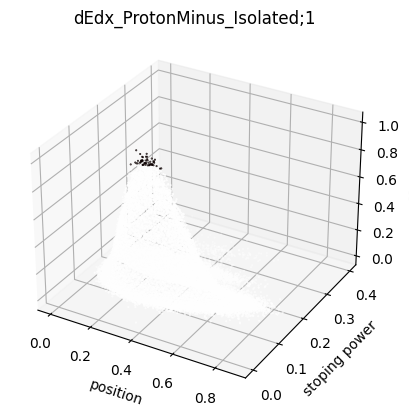

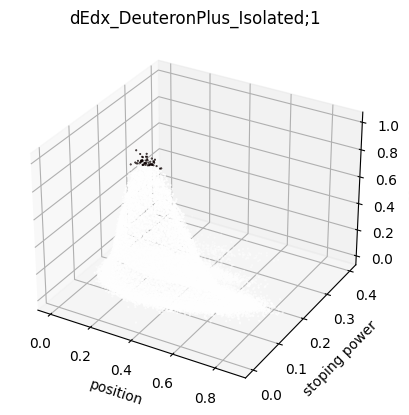

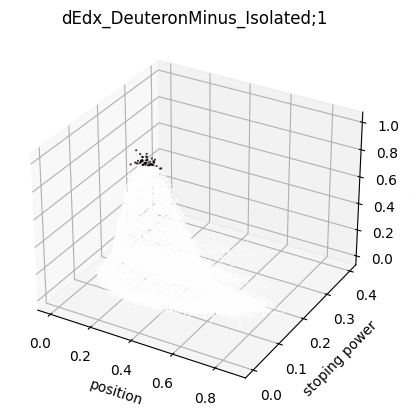

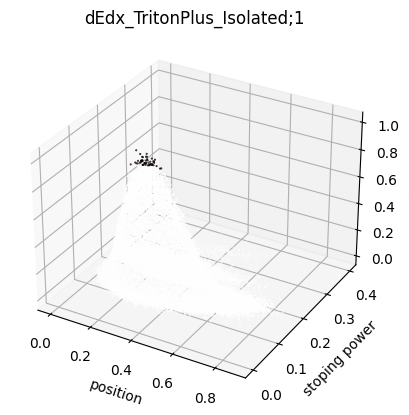

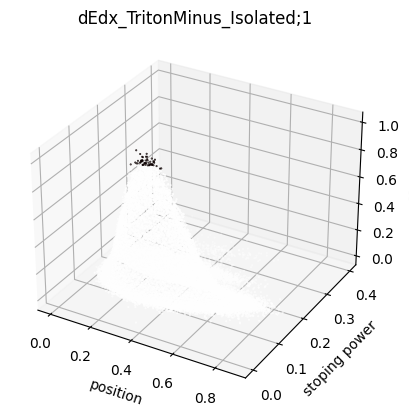

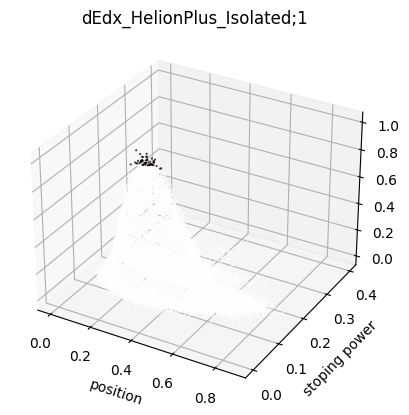

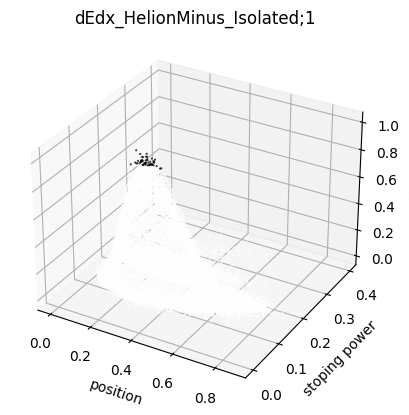

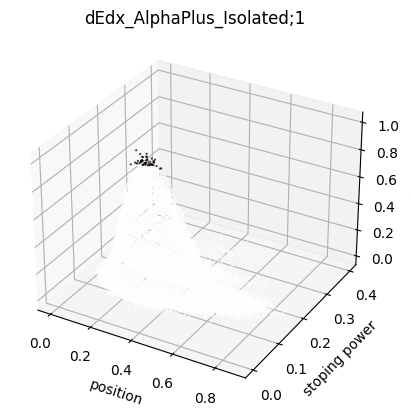

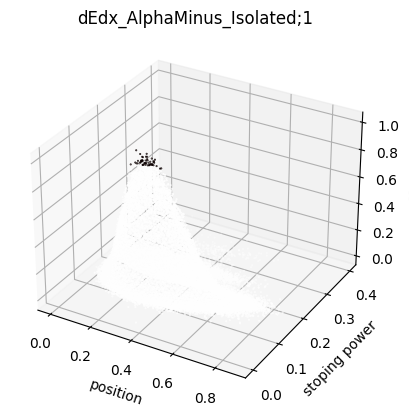

In [140]:
sample_size = 30000
counter = 0
graphs = []
my_labs_l = []
for feature in linear_features:
  if feature.shape[0] <= 30000:
    samp_linear = feature
  else:
    samp_linear = feature.sample(n=sample_size, random_state=42)
    feature_array = samp_linear.values

  dbscan = DBSCAN(eps=0.1, min_samples=700)
  dbscan.fit(feature_array)
  labels = dbscan.labels_

  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(feature_array[:, 0], feature_array[:, 1], feature_array[:, 2], c=labels, cmap='hot', s=0.2)

  my_labs_l.append(labels)
  ax.set_xlabel("position")
  ax.set_ylabel("stoping power")
  ax.set_zlabel("count")
  ax.set_title(features[counter])
  counter += 1
  print(labels)
  graphs.append(fig)
for graph in graphs:
  plt.show()

In [78]:
third_column = test_circle_array[:, 2]
z_scores = np.abs((third_column - third_column.mean()) / third_column.std())
threshold = 3
outlier_indices = np.where(z_scores > threshold)[0]
print(len(outlier_indices))
mask = np.logical_not(np.isin(np.arange(len(third_column)), outlier_indices))
test_circle_array = test_circle_array[mask]

668


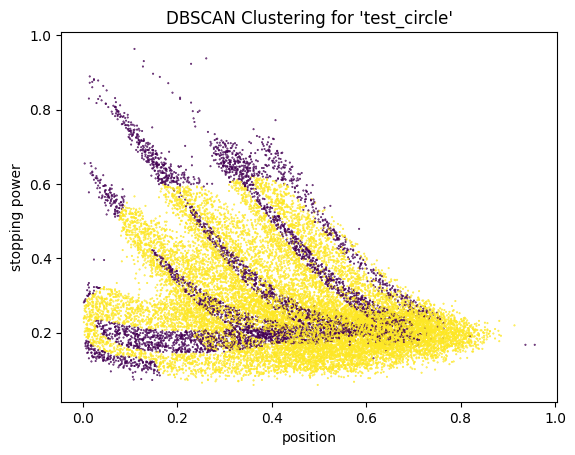

[-1  0 -1 ... -1  0  0]


'test_linear = linear_compress.drop(\'label\', axis=1)\n\n# Convert \'test_linear\' to a NumPy array\ntest_linear_array = test_linear.values\n\ndbscan = DBSCAN(eps=0.3, min_samples=5)\ndbscan.fit(test_linear_array)\nlabels = dbscan.labels_\nplt.scatter(test_linear_array[:, 0], test_linear_array[:, 1], c=labels, cmap=\'viridis\')\nplt.title("DBSCAN Clustering for \'test_linear\'")\nplt.xlabel("Feature 1")\nplt.ylabel("Feature 2")\nplt.show()'

In [94]:

dbscan = DBSCAN(eps=0.1, min_samples=800)
dbscan.fit(test_circle_array)
labels = dbscan.labels_
plt.scatter(test_circle_array[:, 0], test_circle_array[:, 1], c=labels, cmap='viridis', s = 0.2)
plt.title("DBSCAN Clustering for 'test_circle'")
plt.xlabel("position")
plt.ylabel("stopping power")
plt.show()
print(labels)
'''test_linear = linear_compress.drop('label', axis=1)

# Convert 'test_linear' to a NumPy array
test_linear_array = test_linear.values

dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(test_linear_array)
labels = dbscan.labels_
plt.scatter(test_linear_array[:, 0], test_linear_array[:, 1], c=labels, cmap='viridis')
plt.title("DBSCAN Clustering for 'test_linear'")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()'''

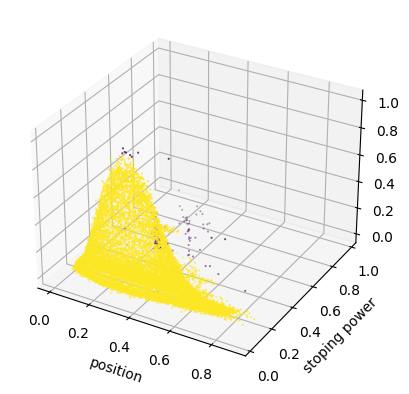

In [109]:
dbscan = DBSCAN(eps=0.1, min_samples=300)
dbscan.fit(test_linear_array)
labels = dbscan.labels_

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(test_linear_array[:, 0], test_linear_array[:, 1], test_linear_array[:, 2], c=labels, cmap='viridis', s=0.2)

# Set labels for each axis
ax.set_xlabel("position")
ax.set_ylabel("stoping power")
ax.set_zlabel("count")

# Show the plot

plt.show()


NameError: ignored